In [1]:
import pandas as pd 
import numpy as np 

In [2]:
train_data = pd.read_csv("bank-additional-full.csv", sep=";")
test_data = pd.read_csv("bank-additional.csv", sep=";")

In [3]:
# CREATE DUMMY VARIABLES for the trainining set 
df1 = train_data

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(df1[var], prefix=var)
    data1=df1.join(cat_list)
    df1 = data1

    

data_vars=df1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final_train = df1[to_keep]
data_final_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [4]:
# CREATE DUMMY VARIABLES for the test set 
df2 = test_data

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(df2[var], prefix=var)
    data2=df2.join(cat_list)
    df2 = data2

    

data_vars=df2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final_test = df2[to_keep]
data_final_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# RECURSIVE FEATURE ELIMINATION RFE
X = data_final_train.drop(['y'], axis=1)
y = data_final_train['y']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True  True  True False False False False False False False
  True  True  True]
[47 44 19 50  4 22 25 27  1 38 18  7 34 49 51  1 39  8  1 32 31 52 17 40
 28 53 23 42 14 30 48 43 12 10  2  9 54 29 24 45 26 20 21 16  6  1  5 33
 35 36  1  1  1 41 13 15  3 46 37 11  1  1  1]


In [7]:
important_features_idx =[]
for idx, rank in enumerate(rfe.ranking_):
    if rank==1:
        important_features_idx.append(idx)
        print("rank: {}".format(rank), "index: {}".format(idx))
print(important_features_idx)

rank: 1 index: 8
rank: 1 index: 15
rank: 1 index: 18
rank: 1 index: 45
rank: 1 index: 50
rank: 1 index: 51
rank: 1 index: 52
rank: 1 index: 60
rank: 1 index: 61
rank: 1 index: 62
[8, 15, 18, 45, 50, 51, 52, 60, 61, 62]


In [8]:
important_cols =[]
for idx in important_features_idx:
    important_cols.append(data_final_train.iloc[:,idx].name)
print(important_cols)

['euribor3m', 'job_management', 'job_services', 'contact_telephone', 'month_jun', 'month_mar', 'month_may', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent']


In [17]:
X_train = data_final_train[important_cols]
X_test = data_final_test[important_cols]
y_train = data_final_train['y'].replace({"no":0, "yes":1})
y_test = data_final_test['y'].replace({"no":0, "yes":1})

In [10]:
#Implementing the model
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.284072
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41177
Method:                           MLE   Df Model:                           10
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.1930
Time:                        18:35:32   Log-Likelihood:                -11700.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2571      0.062     20.287      0.000       1.136       1.379

In [11]:
# re fit after eliminating non-significant coefficients 
X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train.drop(columns=['job_management', 'month_jun']))
result1=logit_model.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.284103
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41179
Method:                           MLE   Df Model:                            8
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.1930
Time:                        18:35:32   Log-Likelihood:                -11702.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2649      0.061     20.640      0.000       1.145       1.385

In [12]:
# coefs conf intervals
result1.conf_int()

,0,1
const,1.144784,1.385015
euribor3m,-0.529926,-0.485594
job_services,-0.295943,-0.041343
contact_telephone,-0.209194,-0.027366
month_mar,0.643151,1.009918
month_may,-1.093924,-0.926771
day_of_week_wed,0.107698,0.276367
poutcome_failure,-2.139075,-1.847404
poutcome_nonexistent,-1.731130,-1.475825


In [13]:
# ODDS RATIO 
np.exp(result1.params)

const                   3.542737
euribor3m               0.601842
job_services            0.844811
contact_telephone       0.888447
month_mar               2.285386
month_may               0.364093
day_of_week_wed         1.211710
poutcome_failure        0.136253
poutcome_nonexistent    0.201196
dtype: float64

In [14]:
# odds ratios and 95% CI
params = result1.params
conf = result1.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                          2.5%     97.5%        OR
const                 3.141764  3.994884  3.542737
euribor3m             0.588649  0.615332  0.601842
job_services          0.743830  0.959500  0.844811
contact_telephone     0.811238  0.973005  0.888447
month_mar             1.902466  2.745377  2.285386
month_may             0.334900  0.395830  0.364093
day_of_week_wed       1.113712  1.318332  1.211710
poutcome_failure      0.117764  0.157646  0.136253
poutcome_nonexistent  0.177084  0.228590  0.201196


***

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train.drop(columns=['job_management', 'month_jun']), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test.drop(columns=['job_management', 'month_jun']))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.drop(columns=['job_management', 'month_jun']), 
                                                                                           y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [20]:
predicted = logreg.predict(X_test.drop(columns=['job_management', 'month_jun']))

metrics.accuracy_score(y_test, predicted)

0.9014323865015781

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
(TN,FP,FN,TP) = confusion_matrix(y_test, y_pred).ravel()
print("TN:{}".format(TN), "FP:{}".format(FP), "FN:{}".format(FN), "TP:{}".format(TP))

TN:3631 FP:37 FN:369 TP:82


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3668
           1       0.69      0.18      0.29       451

    accuracy                           0.90      4119
   macro avg       0.80      0.59      0.62      4119
weighted avg       0.88      0.90      0.87      4119



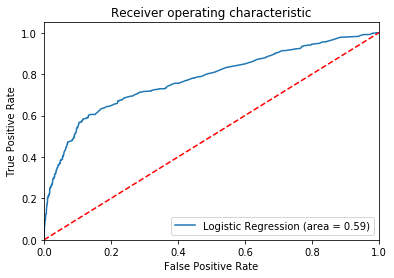

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = logreg.predict_proba(X_test.drop(columns=['job_management', 'month_jun']))[:,1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.drop(columns=['job_management', 'month_jun'])))

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.figure()


plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
type(fpr)

In [24]:
d = {'TPR': tpr, 'FPR': fpr, 'thresholds': thresholds}
DF = pd.DataFrame(data=d)
DF

,TPR,FPR,thresholds
0,0.000000,0.000000,1.851270
1,0.002217,0.000000,0.851270
2,0.024390,0.000000,0.745979
3,0.024390,0.000273,0.729870
4,0.028825,0.000273,0.729090
...,...,...,...
465,0.997783,0.986369,0.016307
466,1.000000,0.992912,0.016299
467,1.000000,0.994547,0.016283
468,1.000000,0.997819,0.016275


In [25]:
DF['thresholds'] = round(DF['thresholds'],3)
DF

,TPR,FPR,thresholds
0,0.000000,0.000000,1.851
1,0.002217,0.000000,0.851
2,0.024390,0.000000,0.746
3,0.024390,0.000273,0.730
4,0.028825,0.000273,0.729
...,...,...,...
465,0.997783,0.986369,0.016
466,1.000000,0.992912,0.016
467,1.000000,0.994547,0.016
468,1.000000,0.997819,0.016


In [26]:
DF = DF.sort_values('thresholds',ascending=True)
DF

,TPR,FPR,thresholds
469,1.000000,1.000000,0.016
464,0.997783,0.983097,0.016
465,0.997783,0.986369,0.016
468,1.000000,0.997819,0.016
467,1.000000,0.994547,0.016
...,...,...,...
4,0.028825,0.000273,0.729
3,0.024390,0.000273,0.730
2,0.024390,0.000000,0.746
1,0.002217,0.000000,0.851


In [27]:
TAP = len(y_test[y_test==1])
TAN = len(y_test[y_test==0])


In [28]:
DF['TAP'] = TAP
DF['TAN'] = TAN
DF

,TPR,FPR,thresholds,TAP,TAN
469,1.000000,1.000000,0.016,451,3668
464,0.997783,0.983097,0.016,451,3668
465,0.997783,0.986369,0.016,451,3668
468,1.000000,0.997819,0.016,451,3668
467,1.000000,0.994547,0.016,451,3668
...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668
3,0.024390,0.000273,0.730,451,3668
2,0.024390,0.000000,0.746,451,3668
1,0.002217,0.000000,0.851,451,3668


In [29]:
DF['TP'] = DF['TPR'] * DF['TAP']
DF['TN'] = (1-DF['FPR']) * DF['TAN']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN
469,1.000000,1.000000,0.016,451,3668,451.0,0.0
464,0.997783,0.983097,0.016,451,3668,450.0,62.0
465,0.997783,0.986369,0.016,451,3668,450.0,50.0
468,1.000000,0.997819,0.016,451,3668,451.0,8.0
467,1.000000,0.994547,0.016,451,3668,451.0,20.0
...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0


In [30]:
DF['FN'] = DF['TAP'] - DF['TP']
DF['FP'] = DF['TAN'] - DF['TN']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP
469,1.000000,1.000000,0.016,451,3668,451.0,0.0,0.0,3668.0
464,0.997783,0.983097,0.016,451,3668,450.0,62.0,1.0,3606.0
465,0.997783,0.986369,0.016,451,3668,450.0,50.0,1.0,3618.0
468,1.000000,0.997819,0.016,451,3668,451.0,8.0,0.0,3660.0
467,1.000000,0.994547,0.016,451,3668,451.0,20.0,0.0,3648.0
...,...,...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0,438.0,1.0
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0,440.0,1.0
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0,440.0,0.0
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0,450.0,0.0


In [31]:
DF['precision'] = DF['TP'] / (DF['TP'] +DF['FP'])
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision
469,1.000000,1.000000,0.016,451,3668,451.0,0.0,0.0,3668.0,0.109493
464,0.997783,0.983097,0.016,451,3668,450.0,62.0,1.0,3606.0,0.110947
465,0.997783,0.986369,0.016,451,3668,450.0,50.0,1.0,3618.0,0.110619
468,1.000000,0.997819,0.016,451,3668,451.0,8.0,0.0,3660.0,0.109706
467,1.000000,0.994547,0.016,451,3668,451.0,20.0,0.0,3648.0,0.110027
...,...,...,...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0,438.0,1.0,0.928571
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0,440.0,1.0,0.916667
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0,440.0,0.0,1.000000
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0,450.0,0.0,1.000000


In [32]:
DF[(DF['thresholds']>0.4) & (DF['thresholds']<=0.55)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision
68,0.219512,0.014995,0.401,451,3668,99.0,3613.0,352.0,55.0,0.642857
67,0.215078,0.014995,0.403,451,3668,97.0,3613.0,354.0,55.0,0.638158
66,0.215078,0.014449,0.412,451,3668,97.0,3615.0,354.0,53.0,0.646667
65,0.212860,0.014449,0.413,451,3668,96.0,3615.0,355.0,53.0,0.644295
64,0.212860,0.013086,0.427,451,3668,96.0,3620.0,355.0,48.0,0.666667
63,0.210643,0.013086,0.429,451,3668,95.0,3620.0,356.0,48.0,0.664336
62,0.210643,0.012541,0.432,451,3668,95.0,3622.0,356.0,46.0,0.673759
61,0.206208,0.012541,0.442,451,3668,93.0,3622.0,358.0,46.0,0.669065
60,0.206208,0.011996,0.442,451,3668,93.0,3624.0,358.0,44.0,0.678832
59,0.203991,0.011723,0.444,451,3668,92.0,3625.0,359.0,43.0,0.681481


In [33]:
DF.columns

Index(['TPR', 'FPR', 'thresholds', 'TAP', 'TAN', 'TP', 'TN', 'FN', 'FP',
       'precision'],
      dtype='object')

In [34]:
DF['specificity'] = 1-DF['FPR']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity
469,1.000000,1.000000,0.016,451,3668,451.0,0.0,0.0,3668.0,0.109493,0.000000
464,0.997783,0.983097,0.016,451,3668,450.0,62.0,1.0,3606.0,0.110947,0.016903
465,0.997783,0.986369,0.016,451,3668,450.0,50.0,1.0,3618.0,0.110619,0.013631
468,1.000000,0.997819,0.016,451,3668,451.0,8.0,0.0,3660.0,0.109706,0.002181
467,1.000000,0.994547,0.016,451,3668,451.0,20.0,0.0,3648.0,0.110027,0.005453
...,...,...,...,...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0,438.0,1.0,0.928571,0.999727
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0,440.0,1.0,0.916667,0.999727
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0,440.0,0.0,1.000000,1.000000
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000


In [35]:
DF[(DF['thresholds']>0.4) & (DF['thresholds']<=0.55)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity
68,0.219512,0.014995,0.401,451,3668,99.0,3613.0,352.0,55.0,0.642857,0.985005
67,0.215078,0.014995,0.403,451,3668,97.0,3613.0,354.0,55.0,0.638158,0.985005
66,0.215078,0.014449,0.412,451,3668,97.0,3615.0,354.0,53.0,0.646667,0.985551
65,0.212860,0.014449,0.413,451,3668,96.0,3615.0,355.0,53.0,0.644295,0.985551
64,0.212860,0.013086,0.427,451,3668,96.0,3620.0,355.0,48.0,0.666667,0.986914
63,0.210643,0.013086,0.429,451,3668,95.0,3620.0,356.0,48.0,0.664336,0.986914
62,0.210643,0.012541,0.432,451,3668,95.0,3622.0,356.0,46.0,0.673759,0.987459
61,0.206208,0.012541,0.442,451,3668,93.0,3622.0,358.0,46.0,0.669065,0.987459
60,0.206208,0.011996,0.442,451,3668,93.0,3624.0,358.0,44.0,0.678832,0.988004
59,0.203991,0.011723,0.444,451,3668,92.0,3625.0,359.0,43.0,0.681481,0.988277


In [36]:
DF['recall/sensitivity'] = DF['TPR']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity
469,1.000000,1.000000,0.016,451,3668,451.0,0.0,0.0,3668.0,0.109493,0.000000,1.000000
464,0.997783,0.983097,0.016,451,3668,450.0,62.0,1.0,3606.0,0.110947,0.016903,0.997783
465,0.997783,0.986369,0.016,451,3668,450.0,50.0,1.0,3618.0,0.110619,0.013631,0.997783
468,1.000000,0.997819,0.016,451,3668,451.0,8.0,0.0,3660.0,0.109706,0.002181,1.000000
467,1.000000,0.994547,0.016,451,3668,451.0,20.0,0.0,3648.0,0.110027,0.005453,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0,438.0,1.0,0.928571,0.999727,0.028825
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0,440.0,1.0,0.916667,0.999727,0.024390
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0,440.0,0.0,1.000000,1.000000,0.024390
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000,0.002217


In [37]:
DF[(DF['precision']>0.8)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity
22,0.090909,0.002726,0.698,451,3668,41.0,3658.0,410.0,10.0,0.803922,0.997274,0.090909
21,0.088692,0.002454,0.700,451,3668,40.0,3659.0,411.0,9.0,0.816327,0.997546,0.088692
19,0.077605,0.002181,0.703,451,3668,35.0,3660.0,416.0,8.0,0.813953,0.997819,0.077605
18,0.075388,0.002181,0.704,451,3668,34.0,3660.0,417.0,8.0,0.809524,0.997819,0.075388
17,0.075388,0.001363,0.707,451,3668,34.0,3663.0,417.0,5.0,0.871795,0.998637,0.075388
16,0.073171,0.001363,0.707,451,3668,33.0,3663.0,418.0,5.0,0.868421,0.998637,0.073171
15,0.068736,0.001363,0.707,451,3668,31.0,3663.0,420.0,5.0,0.861111,0.998637,0.068736
14,0.066519,0.001363,0.707,451,3668,30.0,3663.0,421.0,5.0,0.857143,0.998637,0.066519
11,0.057650,0.001091,0.708,451,3668,26.0,3664.0,425.0,4.0,0.866667,0.998909,0.057650
12,0.064302,0.001091,0.708,451,3668,29.0,3664.0,422.0,4.0,0.878788,0.998909,0.064302


In [38]:
DF['F1_score'] = 2*((DF['precision']*DF['recall/sensitivity'])/(DF['precision']+DF['recall/sensitivity']))
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity,F1_score
469,1.000000,1.000000,0.016,451,3668,451.0,0.0,0.0,3668.0,0.109493,0.000000,1.000000,0.197374
464,0.997783,0.983097,0.016,451,3668,450.0,62.0,1.0,3606.0,0.110947,0.016903,0.997783,0.199689
465,0.997783,0.986369,0.016,451,3668,450.0,50.0,1.0,3618.0,0.110619,0.013631,0.997783,0.199159
468,1.000000,0.997819,0.016,451,3668,451.0,8.0,0.0,3660.0,0.109706,0.002181,1.000000,0.197720
467,1.000000,0.994547,0.016,451,3668,451.0,20.0,0.0,3648.0,0.110027,0.005453,1.000000,0.198242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0,438.0,1.0,0.928571,0.999727,0.028825,0.055914
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0,440.0,1.0,0.916667,0.999727,0.024390,0.047516
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0,440.0,0.0,1.000000,1.000000,0.024390,0.047619
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000,0.002217,0.004425


In [39]:
DF[(DF['thresholds']>0.4) & (DF['thresholds']<=0.55)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity,F1_score
68,0.219512,0.014995,0.401,451,3668,99.0,3613.0,352.0,55.0,0.642857,0.985005,0.219512,0.327273
67,0.215078,0.014995,0.403,451,3668,97.0,3613.0,354.0,55.0,0.638158,0.985005,0.215078,0.321725
66,0.215078,0.014449,0.412,451,3668,97.0,3615.0,354.0,53.0,0.646667,0.985551,0.215078,0.322795
65,0.212860,0.014449,0.413,451,3668,96.0,3615.0,355.0,53.0,0.644295,0.985551,0.212860,0.320000
64,0.212860,0.013086,0.427,451,3668,96.0,3620.0,355.0,48.0,0.666667,0.986914,0.212860,0.322689
63,0.210643,0.013086,0.429,451,3668,95.0,3620.0,356.0,48.0,0.664336,0.986914,0.210643,0.319865
62,0.210643,0.012541,0.432,451,3668,95.0,3622.0,356.0,46.0,0.673759,0.987459,0.210643,0.320946
61,0.206208,0.012541,0.442,451,3668,93.0,3622.0,358.0,46.0,0.669065,0.987459,0.206208,0.315254
60,0.206208,0.011996,0.442,451,3668,93.0,3624.0,358.0,44.0,0.678832,0.988004,0.206208,0.316327
59,0.203991,0.011723,0.444,451,3668,92.0,3625.0,359.0,43.0,0.681481,0.988277,0.203991,0.313993


In [40]:
DF.sort_values('F1_score', ascending=False)

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity,F1_score
247,0.567627,0.104417,0.235,451,3668,256.0,3285.0,195.0,383.0,0.400626,0.895583,0.567627,0.469725
248,0.567627,0.104962,0.234,451,3668,256.0,3283.0,195.0,385.0,0.399376,0.895038,0.567627,0.468864
249,0.567627,0.106052,0.230,451,3668,256.0,3279.0,195.0,389.0,0.396899,0.893948,0.567627,0.467153
250,0.567627,0.106598,0.230,451,3668,256.0,3277.0,195.0,391.0,0.395672,0.893402,0.567627,0.466302
244,0.558758,0.103053,0.236,451,3668,252.0,3290.0,199.0,378.0,0.400000,0.896947,0.558758,0.466235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.028825,0.000273,0.729,451,3668,13.0,3667.0,438.0,1.0,0.928571,0.999727,0.028825,0.055914
2,0.024390,0.000000,0.746,451,3668,11.0,3668.0,440.0,0.0,1.000000,1.000000,0.024390,0.047619
3,0.024390,0.000273,0.730,451,3668,11.0,3667.0,440.0,1.0,0.916667,0.999727,0.024390,0.047516
1,0.002217,0.000000,0.851,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000,0.002217,0.004425


***

In [41]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41179
Method:                           MLE   Df Model:                            8
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.1930
Time:                        18:38:52   Log-Likelihood:                -11702.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2649      0.061     20.640      0.000       1.145       1.385
euribor3m               -0.5078      0.011    -44.897      0.000      -0.530      -0.486
job_services

In [42]:
def logit(euribor3m, job_services, contact_telephone, month_mar, month_may, 
      day_of_week_wed, poutcome_failure, poutcome_nonexistent):
    g = 1.2649 -(0.5078*euribor3m) -(0.1686*job_services) - (0.1183*contact_telephone) +(0.8265* month_mar) - (1.0103*month_may) + (0.1920*day_of_week_wed) - (1.9932*poutcome_failure) -(1.6035*poutcome_nonexistent)
    return g


In [57]:
logit(0.5,0,0,1,0,1,0,0)

2.0295

In [44]:
def probability_subscription(g):
    probability = np.exp(g)/ (1+np.exp(g))
    return probability

In [58]:
probability_subscription(2.0295)

0.8838597619395645

In [59]:
#ODDS R
np.exp(result1.params)

const                   3.542737
euribor3m               0.601842
job_services            0.844811
contact_telephone       0.888447
month_mar               2.285386
month_may               0.364093
day_of_week_wed         1.211710
poutcome_failure        0.136253
poutcome_nonexistent    0.201196
dtype: float64

In [60]:
f = open("bank-additional-names.txt", "r")
print(f.read())

ï»¿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: SÃ©rgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   T